In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [236]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [237]:
# inspect the dataset shape
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [238]:
train_labels = train_data['label']
train_data = train_data.drop('label', axis = 1)

In [239]:
encoder = OneHotEncoder()
y = encoder.fit_transform(train_labels.values.reshape(-1, 1)).toarray()

In [240]:
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
#train_data = train_data.to_numpy().reshape(train_data.shape[0], 28, 28)

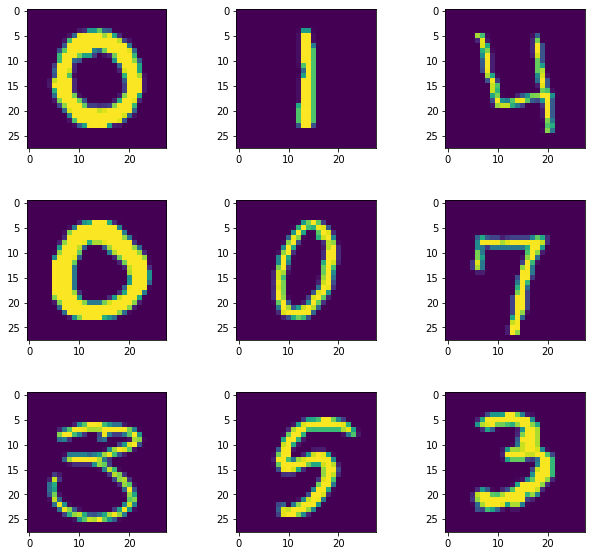

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 0.5)
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(train_data[i])

In [241]:
def residual_block(input_data):
    
    # layer 1
    Z1 = tfl.Dense(100)(input_data)
    BatchNorm1 = tfl.BatchNormalization()(Z1, training = True)
    A1 = tfl.ReLU()(BatchNorm1)
    
    # layer 2
    Z2 = tfl.Dense(100)(A1)
    BatchNorm2 = tfl.BatchNormalization()(Z2, training = True)
    A2 = tfl.ReLU()(BatchNorm2)
    
    # layer 3
    Z3 = tfl.Dense(100)(A2)
    BatchNorm3 = tfl.BatchNormalization()(Z3, training = True)
    # skip layer - ResNet
    Z3_inter = tfl.Add()([BatchNorm3, A1])
    A3 = tfl.ReLU()(Z3_inter)
    
    return A3

In [242]:
def digit_classifier():
    # defining input layer
    input_data = tf.keras.Input(shape = (784,))
    
    # layer 1
    Layer1 = tfl.Dense(500, activation = 'relu')(input_data)
    
    # residual block
    Layer2 = residual_block(Layer1)
    
    # top layer
    Layer3 = tfl.Dense(100, activation = 'relu')(Layer2)
    Dropout = tfl.Dropout(0.2)(Layer3)
    output = tfl.Dense(10, activation = 'softmax')(Dropout)
    
    model = tf.keras.Model(inputs = input_data, outputs = [output])
    
    return model

In [243]:
clf = digit_classifier()
clf.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_42 (Dense)               (None, 500)          392500      ['input_11[0][0]']               
                                                                                                  
 dense_43 (Dense)               (None, 100)          50100       ['dense_42[0][0]']               
                                                                                                  
 batch_normalization_17 (BatchN  (None, 100)         400         ['dense_43[0][0]']               
 ormalization)                                                                              

In [244]:
clf.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
           )

In [245]:
clf.fit(train_data, y, epochs = 20, validation_split = 0.05)

Epoch 1/2
1247/1247 [==============================] - 8s 5ms/step - loss: 0.0539 - accuracy: 0.9129 - val_loss: 0.0286 - val_accuracy: 0.9490
Epoch 2/2
1247/1247 [==============================] - 7s 5ms/step - loss: 0.0243 - accuracy: 0.9619 - val_loss: 0.0218 - val_accuracy: 0.9619


In [169]:
history = clf.history.history
loss_metrics = pd.DataFrame({
    'loss' : history['loss'],
    'val_loss' : history['val_loss']
})
accuracy_metrics = pd.DataFrame({
    'accuracy' : history['accuracy'],
    'val_accuracy' : history['val_accuracy']
})

<AxesSubplot:xlabel='Epochs', ylabel='Loss'>

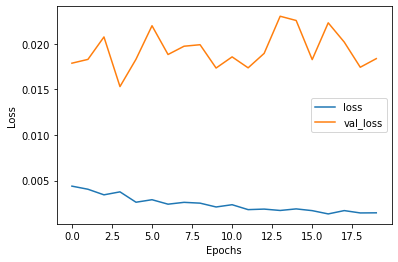

In [170]:
loss_metrics.plot(xlabel = 'Epochs', ylabel = 'Loss')

<AxesSubplot:xlabel='Epochs', ylabel='Accuracy'>

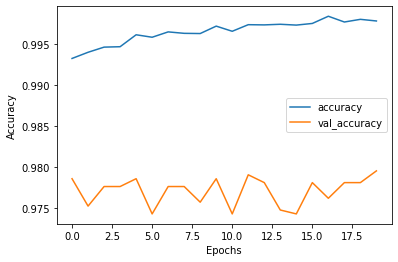

In [171]:
accuracy_metrics.plot(xlabel = 'Epochs', ylabel = 'Accuracy')

In [194]:
y_pred = clf.predict(test_data)

875/875 [==============================] - 2s 2ms/step


In [173]:
y_pred

array([[9.5589341e-16, 4.4775923e-13, 1.0000000e+00, ..., 3.8475185e-13,
        5.4914000e-13, 1.1444655e-14],
       [1.0000000e+00, 4.0210568e-14, 1.5744275e-15, ..., 1.5375139e-14,
        1.9638264e-14, 3.8498382e-13],
       [2.8039791e-08, 2.1269462e-09, 3.0212359e-09, ..., 6.8071582e-10,
        1.4478434e-07, 9.9999964e-01],
       ...,
       [2.5650902e-15, 8.4599130e-13, 2.2294192e-14, ..., 8.0783275e-13,
        6.6262972e-12, 5.2933539e-12],
       [1.6616574e-09, 4.0567619e-11, 3.8631560e-11, ..., 6.0573678e-11,
        6.8012394e-11, 1.0000000e+00],
       [1.1514200e-13, 1.3957173e-11, 1.0000000e+00, ..., 8.9785096e-11,
        8.2256751e-10, 3.1708913e-11]], dtype=float32)

In [195]:
submission = pd.DataFrame({
    'ImageId' : np.arange(1, y_pred.shape[0]+1),
    'Label' : y_pred.argmax(axis = 1)
})

In [196]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [197]:
submission.to_csv('submission.csv', index = False)